In [31]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
#NLTK (The Natural Language Toolkit) is a suite of libraries and programs for natural language processing 
nltk.download() # you need to run this code once to download nltk. Once downlaoded you just need to import it everytime you run the program

In [32]:
import nltk

In [33]:
df_review = pd.read_csv(r"C:\Users\aindr\Documents\Teaching\CIS3389\CIS3389_Spring 2021\Week 14\OfficeProducts.csv")

In [34]:
df_review.head()

,asin,reviewText,overall_rating,reviewTime
0,B00000JBLH,"I bought my first HP12C in about 1984 or so, a...",5,"09 3, 2004"
1,B00000JBLH,WHY THIS BELATED REVIEW? I feel very obliged t...,5,"12 15, 2007"
2,B00000JBLH,I have an HP 48GX that has been kicking for mo...,2,"01 1, 2011"
3,B00000JBLH,I've started doing more finance stuff recently...,5,"04 19, 2006"
4,B00000JBLH,For simple calculations and discounted cash fl...,5,"08 4, 2013"


In [ ]:
#data pre-processing-lowering the case, tokenization, stemming, and removal of stop words

In [35]:
#lowering the case
df_review['reviewText_lower'] = df_review['reviewText'].str.lower()

In [36]:
df_review.head ()

,asin,reviewText,overall_rating,reviewTime,reviewText_lower
0,B00000JBLH,"I bought my first HP12C in about 1984 or so, a...",5,"09 3, 2004","i bought my first hp12c in about 1984 or so, a..."
1,B00000JBLH,WHY THIS BELATED REVIEW? I feel very obliged t...,5,"12 15, 2007",why this belated review? i feel very obliged t...
2,B00000JBLH,I have an HP 48GX that has been kicking for mo...,2,"01 1, 2011",i have an hp 48gx that has been kicking for mo...
3,B00000JBLH,I've started doing more finance stuff recently...,5,"04 19, 2006",i've started doing more finance stuff recently...
4,B00000JBLH,For simple calculations and discounted cash fl...,5,"08 4, 2013",for simple calculations and discounted cash fl...


In [37]:
#check the first review
df_review.iloc[0,4]

"i bought my first hp12c in about 1984 or so, and it served me faithfully until 2002 when i lost it while travelling.  i searched for another one to replace it, but found one difficult to come by in my area.  so, i decided to buy up and purchased an hp 49g.  what a mistake!  i know that many people view the hp 49g (now 49g+) as the flagship of the hp line, but for me that was a disaster.the 49g may be powerful, but using it is extremely counterintuitive...and the manual was sketchy at best.  the 12c, on the other hand, does what i need in a way that makes good sense to me.if you are looking for a solid, reliable calculator, the hp12c may be for you.  it's programmable.  it does basic statistics well, and many business applications too.  the manual makes sense; you will be up and running in short order.i'm ready to set my 49g aside and move back to my old friend.  i didn't even have to replace the batteries in well over a decade of use!hp 12c, i'm coming home!"

In [38]:
#check first review tokenization
nltk.word_tokenize(df_review.iloc[0,4])

['i',
 'bought',
 'my',
 'first',
 'hp12c',
 'in',
 'about',
 '1984',
 'or',
 'so',
 ',',
 'and',
 'it',
 'served',
 'me',
 'faithfully',
 'until',
 '2002',
 'when',
 'i',
 'lost',
 'it',
 'while',
 'travelling',
 '.',
 'i',
 'searched',
 'for',
 'another',
 'one',
 'to',
 'replace',
 'it',
 ',',
 'but',
 'found',
 'one',
 'difficult',
 'to',
 'come',
 'by',
 'in',
 'my',
 'area',
 '.',
 'so',
 ',',
 'i',
 'decided',
 'to',
 'buy',
 'up',
 'and',
 'purchased',
 'an',
 'hp',
 '49g',
 '.',
 'what',
 'a',
 'mistake',
 '!',
 'i',
 'know',
 'that',
 'many',
 'people',
 'view',
 'the',
 'hp',
 '49g',
 '(',
 'now',
 '49g+',
 ')',
 'as',
 'the',
 'flagship',
 'of',
 'the',
 'hp',
 'line',
 ',',
 'but',
 'for',
 'me',
 'that',
 'was',
 'a',
 'disaster.the',
 '49g',
 'may',
 'be',
 'powerful',
 ',',
 'but',
 'using',
 'it',
 'is',
 'extremely',
 'counterintuitive',
 '...',
 'and',
 'the',
 'manual',
 'was',
 'sketchy',
 'at',
 'best',
 '.',
 'the',
 '12c',
 ',',
 'on',
 'the',
 'other',
 'hand',

In [39]:
df_review['reviewText_lower'] = df_review['reviewText_lower'].apply(str)

In [40]:
#Tokenization of all reviews
def tokenize(df):
    review = df['reviewText_lower']
    tokens = nltk.word_tokenize(review)
    token_words = [w for w in tokens if w.isalnum()]
    return token_words
    #return tokens

df_review['tokenize'] = df_review.apply(tokenize, axis =1)

In [41]:
df_review.head(3)

,asin,reviewText,overall_rating,reviewTime,reviewText_lower,tokenize
0,B00000JBLH,"I bought my first HP12C in about 1984 or so, a...",5,"09 3, 2004","i bought my first hp12c in about 1984 or so, a...","[i, bought, my, first, hp12c, in, about, 1984,..."
1,B00000JBLH,WHY THIS BELATED REVIEW? I feel very obliged t...,5,"12 15, 2007",why this belated review? i feel very obliged t...,"[why, this, belated, review, i, feel, very, ob..."
2,B00000JBLH,I have an HP 48GX that has been kicking for mo...,2,"01 1, 2011",i have an hp 48gx that has been kicking for mo...,"[i, have, an, hp, 48gx, that, has, been, kicki..."


In [42]:
df_review.iloc[0,5]

['i',
 'bought',
 'my',
 'first',
 'hp12c',
 'in',
 'about',
 '1984',
 'or',
 'so',
 'and',
 'it',
 'served',
 'me',
 'faithfully',
 'until',
 '2002',
 'when',
 'i',
 'lost',
 'it',
 'while',
 'travelling',
 'i',
 'searched',
 'for',
 'another',
 'one',
 'to',
 'replace',
 'it',
 'but',
 'found',
 'one',
 'difficult',
 'to',
 'come',
 'by',
 'in',
 'my',
 'area',
 'so',
 'i',
 'decided',
 'to',
 'buy',
 'up',
 'and',
 'purchased',
 'an',
 'hp',
 '49g',
 'what',
 'a',
 'mistake',
 'i',
 'know',
 'that',
 'many',
 'people',
 'view',
 'the',
 'hp',
 '49g',
 'now',
 'as',
 'the',
 'flagship',
 'of',
 'the',
 'hp',
 'line',
 'but',
 'for',
 'me',
 'that',
 'was',
 'a',
 '49g',
 'may',
 'be',
 'powerful',
 'but',
 'using',
 'it',
 'is',
 'extremely',
 'counterintuitive',
 'and',
 'the',
 'manual',
 'was',
 'sketchy',
 'at',
 'best',
 'the',
 '12c',
 'on',
 'the',
 'other',
 'hand',
 'does',
 'what',
 'i',
 'need',
 'in',
 'a',
 'way',
 'that',
 'makes',
 'good',
 'sense',
 'to',
 'you',
 'ar

In [44]:
#Remove Stopwords
from nltk.corpus import stopwords
stopword = stopwords.words('english')

def remove_stopwords(df):
    tokens = df['tokenize']
    words = [w for w in tokens if not w in stopword]
    return (words)

df_review['words'] = df_review.apply(remove_stopwords, axis=1)

In [45]:
df_review.head(3)

,asin,reviewText,overall_rating,reviewTime,reviewText_lower,tokenize,words
0,B00000JBLH,"I bought my first HP12C in about 1984 or so, a...",5,"09 3, 2004","i bought my first hp12c in about 1984 or so, a...","[i, bought, my, first, hp12c, in, about, 1984,...","[bought, first, hp12c, 1984, served, faithfull..."
1,B00000JBLH,WHY THIS BELATED REVIEW? I feel very obliged t...,5,"12 15, 2007",why this belated review? i feel very obliged t...,"[why, this, belated, review, i, feel, very, ob...","[belated, review, feel, obliged, share, views,..."
2,B00000JBLH,I have an HP 48GX that has been kicking for mo...,2,"01 1, 2011",i have an hp 48gx that has been kicking for mo...,"[i, have, an, hp, 48gx, that, has, been, kicki...","[hp, 48gx, kicking, twenty, years, hp, 11, 25,..."


In [47]:
#Stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()


In [50]:
def stemmed(df):
    list1 = df['words']
    stemmed_words = [stemmer.stem(i) for i in list1]
    return (stemmed_words)

df_review['stemmed_words'] = df_review.apply(stemmed, axis=1)

In [51]:
df_review.head(3)

,asin,reviewText,overall_rating,reviewTime,reviewText_lower,tokenize,words,stemmed_words
0,B00000JBLH,"I bought my first HP12C in about 1984 or so, a...",5,"09 3, 2004","i bought my first hp12c in about 1984 or so, a...","[i, bought, my, first, hp12c, in, about, 1984,...","[bought, first, hp12c, 1984, served, faithfull...","[bought, first, hp12c, 1984, serv, faith, 2002..."
1,B00000JBLH,WHY THIS BELATED REVIEW? I feel very obliged t...,5,"12 15, 2007",why this belated review? i feel very obliged t...,"[why, this, belated, review, i, feel, very, ob...","[belated, review, feel, obliged, share, views,...","[belat, review, feel, oblig, share, view, old,..."
2,B00000JBLH,I have an HP 48GX that has been kicking for mo...,2,"01 1, 2011",i have an hp 48gx that has been kicking for mo...,"[i, have, an, hp, 48gx, that, has, been, kicki...","[hp, 48gx, kicking, twenty, years, hp, 11, 25,...","[hp, 48gx, kick, twenti, year, hp, 11, 25, yea..."


In [55]:
#download the following for pos tags
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aindr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [58]:
#Tagging each word with parts-of-speech
df_review['parts_of_speech']=df_review['words'].apply(nltk.pos_tag)

In [64]:
df_review.head(3)

,asin,reviewText,overall_rating,reviewTime,reviewText_lower,tokenize,words,stemmed_words,parts_of_speech
0,B00000JBLH,"I bought my first HP12C in about 1984 or so, a...",5,"09 3, 2004","i bought my first hp12c in about 1984 or so, a...","[i, bought, my, first, hp12c, in, about, 1984,...","[bought, first, hp12c, 1984, served, faithfull...","[bought, first, hp12c, 1984, serv, faith, 2002...","[(bought, VBD), (first, RB), (hp12c, JJ), (198..."
1,B00000JBLH,WHY THIS BELATED REVIEW? I feel very obliged t...,5,"12 15, 2007",why this belated review? i feel very obliged t...,"[why, this, belated, review, i, feel, very, ob...","[belated, review, feel, obliged, share, views,...","[belat, review, feel, oblig, share, view, old,...","[(belated, VBN), (review, NN), (feel, NN), (ob..."
2,B00000JBLH,I have an HP 48GX that has been kicking for mo...,2,"01 1, 2011",i have an hp 48gx that has been kicking for mo...,"[i, have, an, hp, 48gx, that, has, been, kicki...","[hp, 48gx, kicking, twenty, years, hp, 11, 25,...","[hp, 48gx, kick, twenti, year, hp, 11, 25, yea...","[(hp, NN), (48gx, CD), (kicking, VBG), (twenty..."


In [59]:
df_review.iloc[0,8]

[('bought', 'VBD'),
 ('first', 'RB'),
 ('hp12c', 'JJ'),
 ('1984', 'CD'),
 ('served', 'VBD'),
 ('faithfully', 'RB'),
 ('2002', 'CD'),
 ('lost', 'VBD'),
 ('travelling', 'VBG'),
 ('searched', 'VBN'),
 ('another', 'DT'),
 ('one', 'CD'),
 ('replace', 'VB'),
 ('found', 'VBN'),
 ('one', 'CD'),
 ('difficult', 'JJ'),
 ('come', 'JJ'),
 ('area', 'NN'),
 ('decided', 'VBD'),
 ('buy', 'NN'),
 ('purchased', 'VBD'),
 ('hp', 'JJ'),
 ('49g', 'CD'),
 ('mistake', 'NN'),
 ('know', 'VBD'),
 ('many', 'JJ'),
 ('people', 'NNS'),
 ('view', 'VBP'),
 ('hp', 'JJ'),
 ('49g', 'CD'),
 ('flagship', 'NN'),
 ('hp', 'NN'),
 ('line', 'NN'),
 ('49g', 'CD'),
 ('may', 'MD'),
 ('powerful', 'JJ'),
 ('using', 'VBG'),
 ('extremely', 'RB'),
 ('counterintuitive', 'JJ'),
 ('manual', 'JJ'),
 ('sketchy', 'NN'),
 ('best', 'JJS'),
 ('12c', 'CD'),
 ('hand', 'NN'),
 ('need', 'MD'),
 ('way', 'NN'),
 ('makes', 'VBZ'),
 ('good', 'JJ'),
 ('sense', 'NN'),
 ('looking', 'VBG'),
 ('solid', 'JJ'),
 ('reliable', 'JJ'),
 ('calculator', 'NN'),
 ('hp

In [77]:
#rejoin words into a single string
def join_words(df):
    list2 = df['words']
    joined_words = ( " ".join(list2))
    return joined_words

df_review['joined_words'] = df_review.apply(join_words, axis=1)

In [78]:
df_review.head(3)

,asin,reviewText,overall_rating,reviewTime,reviewText_lower,tokenize,words,stemmed_words,parts_of_speech,joined_words
0,B00000JBLH,"I bought my first HP12C in about 1984 or so, a...",5,"09 3, 2004","i bought my first hp12c in about 1984 or so, a...","[i, bought, my, first, hp12c, in, about, 1984,...","[bought, first, hp12c, 1984, served, faithfull...","[bought, first, hp12c, 1984, serv, faith, 2002...","[(bought, VBD), (first, RB), (hp12c, JJ), (198...",bought first hp12c 1984 served faithfully 2002...
1,B00000JBLH,WHY THIS BELATED REVIEW? I feel very obliged t...,5,"12 15, 2007",why this belated review? i feel very obliged t...,"[why, this, belated, review, i, feel, very, ob...","[belated, review, feel, obliged, share, views,...","[belat, review, feel, oblig, share, view, old,...","[(belated, VBN), (review, NN), (feel, NN), (ob...",belated review feel obliged share views old wo...
2,B00000JBLH,I have an HP 48GX that has been kicking for mo...,2,"01 1, 2011",i have an hp 48gx that has been kicking for mo...,"[i, have, an, hp, 48gx, that, has, been, kicki...","[hp, 48gx, kicking, twenty, years, hp, 11, 25,...","[hp, 48gx, kick, twenti, year, hp, 11, 25, yea...","[(hp, NN), (48gx, CD), (kicking, VBG), (twenty...",hp 48gx kicking twenty years hp 11 25 years ol...


In [62]:
#count of each rating
df_review['overall_rating'].value_counts()

5    30327
4    15015
3     5060
2     1726
1     1130
Name: overall_rating, dtype: int64

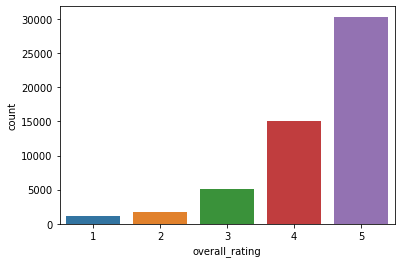

In [63]:
#plot of each rating
sns.countplot(df_review['overall_rating'], label = "Count")

In [ ]:
#Create wordcloud

In [80]:
wordlist = df_review['joined_words'].tolist()

In [81]:
len(wordlist)

53258

In [82]:
allwords =" ".join(wordlist)

In [83]:
len(allwords)

25139674

In [75]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\aindr\AppData\Local\Continuum\anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.1               |   py37h03978a9_0         3.1 MB  conda-forge
    wordcloud-1.8.1            |   py37hcc03f2d_1         194 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be INSTALLED:

  wordcloud          conda-forge/win-64::wordcloud-1.8.1-py37hcc03f2d_1

The following packages will be UPDATED:

  conda                                4.8.3-py37hc8dfbb8_1 --> 4.10.1-py37h03978a9_0




conda-4.10.1         | 3.1 MB    |            |   0% 
conda-4.10.1         | 3.1 MB    |            |   1% 
conda-4.10.1         | 3.1 MB   

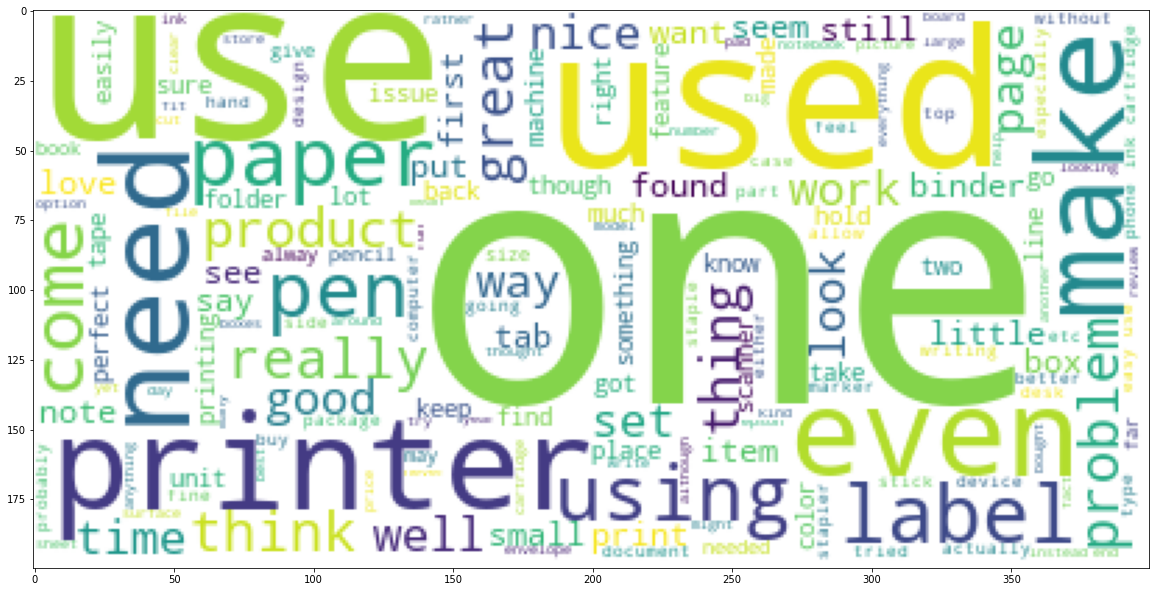

In [85]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud(background_color="white").generate(allwords))